In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#instalando a versao do plotly 
!pip install plotly==4.1.0

     |████████████████████████████████| 7.1MB 5.0MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.1.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('Wine.csv') #importando os dados

In [ ]:
print("O dado possui",df.shape[0], "amostras e", df.shape[1], "atributos")

O dado possui 178 amostras e 14 atributos


In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
labels_df = df['Customer_Segment']
df = df.drop(columns = 'Customer_Segment')
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 
                          'Ash' : 'Po', 
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio',
                          'Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides',
                          'Color_Intensity':'Intensidade_de_cor'})

In [ ]:
colunas = df.columns
colunas


Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_Fenois', 'Flavanoids', 'Fenois_nao_flavalonoides',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
!pip install biokit

     |████████████████████████████████| 204kB 5.2MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 235kB 7.7MB/s 
     |████████████████████████████████| 2.3MB 9.4MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 9.9MB 31.0MB/s 
     |████████████████████████████████| 153kB 56.9MB/s 
     |████████████████████████████████| 5.6MB 34.4MB/s 
     |████████████████████████████████| 256kB 51.8MB/s 
  Created wheel for biokit: filename=biokit-0.4.6-cp37-none-any.whl size=212704 sha256=4c3664983b28df50ddd73214b8119adc6fde760442079372470310d95b69b295
  Stored in directory: /root/.cache/pip/wheels/4b/a4/b8/d175a38f46474694964e00f1d6c37335e4cce1b24de74093d2
  Created wheel for easydev: filename=easydev-0.11.0-cp37-none-any.whl size=64244 sha256=eb7b96fd5bb74c3e0369e1762675270ac58677f0bb5b92ee9f6206da3e778149
  Stored in directory: /root/.cache/pip/wheels/17/69/b5/771949d8100a30aa33e4bc5d0ff77eced9

In [ ]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


In [ ]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


/usr/local/lib/python3.7/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



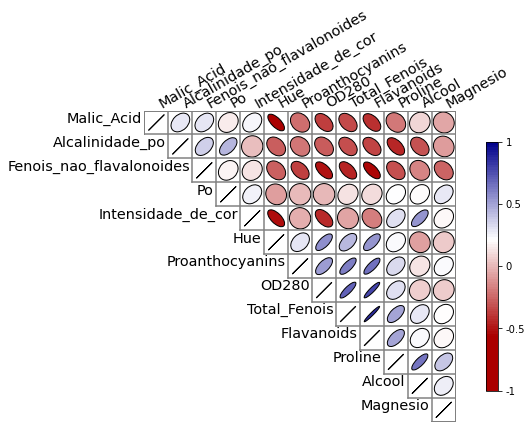

In [ ]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large') #matriz de correlacao superior
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()


In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() #padronizando para ficar valores de 0 a 1
np_df = min_max_scaler.fit_transform(df)

In [ ]:
#for atributo in atributos:
#  df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo])-min(df[atributo])) #variacao 0 a 1

#usado para fazer a normalizacao na mao

In [ ]:
df = pd.DataFrame(np_df, columns = colunas)

In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
np_df = min_max_scaler.inverse_transform(df) #revertendo a normalizacao


In [ ]:
df_nao_normalizado = pd.DataFrame(np_df, columns = colunas)
df_nao_normalizado.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
#clusterizacao dos dados
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters = 4) #o chefe disse que poderia ter de 2 a 4 grupos de consumidores

In [ ]:
agrupador.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = agrupador.labels_ #labels_ é um metodo que tem dentro do agrupador
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 0 3 0 0 0 3 0 3 0 0 2
 0 3 0 3 0 0 0 0 3 1 0 0 3 3 3 3 3 3 3 0 0 2 0 0 0 0 0 3 0 3 0 3 0 3 0 0 0
 0 3 3 0 3 0 0 3 0 0 0 0 0 0 0 0 3 0 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 3 3 3 1 3 1 3 3 0
 3 1 3 1 1 3 3 3 1 2 3 3 1 3 1 3 1 1 1 3 3 0 3 3 3 3 3 1 3 3 3 1 3 1 3 3 3
 3 1 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3,
       1, 3, 1, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
fig = go.Figure() #graphic objects

In [ ]:
#transformando para um grafico

fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], 
                         y=df['Alcool'], 
                         mode = 'markers', 
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

In [ ]:
agrupador = KMeans(n_clusters = 4) #criando um grafico com 4 clusters
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 3 3 3 0 3 0 3 3 1
 3 0 3 0 3 3 3 3 0 2 3 3 0 0 0 0 0 0 0 3 3 1 3 3 3 3 3 0 3 0 3 0 3 0 3 3 3
 3 0 0 3 0 3 3 2 3 3 3 3 3 3 3 3 0 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], 
                         y=df['Alcool'], 
                         mode = 'markers', 
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                           y=df['Alcool'],
                           z=df['Proline'],
                           mode = 'markers', 
                           marker = dict(color = agrupador.labels_.astype(np.float)), #cores diferentes para cada bolinha
                           text = labels)) #para na hora que passar o mouse por cima ele vai mostrar qual grupo pertence
fig.show()

In [ ]:
fig.update_layout(scene = dict(xaxis_title = 'Instensidade de Cor',
                               yaxis_title = 'Álcool',
                               zaxis_title = 'Proline'))
fig.show()

In [ ]:
#colocando os centros dos clusters
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
0,0.298583,0.194360,0.489099,0.497423,0.226589,0.314721,0.260873,0.623367,0.265470,0.140588,0.508943,0.421386,0.182322
1,0.711240,0.235747,0.584610,0.343089,0.412675,0.645821,0.557892,0.300608,0.478372,0.358275,0.481742,0.689079,0.603218
2,0.556316,0.515059,0.569840,0.553093,0.311304,0.240414,0.098523,0.604528,0.235457,0.510614,0.167642,0.157070,0.245678
3,0.343390,0.266063,0.467604,0.483337,0.273003,0.521251,0.437494,0.318561,0.451398,0.164100,0.443184,0.651504,0.160867


In [ ]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                           y=centros['Alcool'],
                           z=centros['Proline'],
                           mode='markers',
                           marker = dict(color='green'),
                           text=[0, 1, 2]))
fig.show()

In [ ]:
from sklearn.cluster import DBSCAN # agrupamento espacial baseados em densidade com ruido
agrupador = DBSCAN(eps=1.31, min_samples= 15, metric = 'manhattan') 
agrupador.fit(df)
#EPS distancia maxima entre dois pontos para que sejam considerados vizinhos ou pertencentes ao mesmo cluster
#min samples é o minimo para considerar um cluster

DBSCAN(algorithm='auto', eps=1.31, leaf_size=30, metric='manhattan',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [ ]:
agrupador.labels_ #grupo -1 classifica como ruido

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
np.unique(agrupador.labels_)
#faz a contagem de quantos clusters o metodo acha que é importante
#a dificuldade do DBSCAN é definir o eps e min_samples pq dependendo da densidade dos dados pode variar bastante

array([-1,  0,  1,  2])

In [ ]:
#DBSCAN se propoe a resolver o agrupamento de n pontos de um conjunto em grupos de densidade especifica
#o KMEANS não funciona bem quando eles nao tem simetria radial como se fosse um 'circulo'
#ele faz a diferenca dos pontos para considera os pontos como vizinhos
#define o minimo de pontos para estabelecer um cluster
#ele vai fazendo pequenos circulos de clusters e quando identifica que nao tem mais pontos vizinhos ele para
#ele classifica como ruido aquilo que ficar distante dos clusters principais

#objetivo fazer com cada grupo tenha pelo menos um numero minimo, ou densidade minima de pontos vizinhos, 
#considerando como condicao de vizinhanca uma distancia menor ou igual a eps

#vantagens:robusto a outliers, detectar qualquer tipo de forma, custo computacional nao tao alto, segundo tipo de algoritmo de clusterizacao mais utilizado

#desvantagens: nao funciona bem com dados de alta dimensionalidade (muitos atributos), 
#nao consegue identificar clusters de varias densidades, uma vez que eps e min_samples sao fixos,
#ainda a parametrizacao de eps e min samples nao é sempre uma tarefa facil



In [ ]:
agrupador = DBSCAN(eps = 0.01, min_samples=15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#todas as amostras foram consideradas como ruido, quando usa um valor tao proximo de eps 
#dessa forma ele queria considerar uma proximidade tao grande e nao encontrou e considerou tudo ruido

In [ ]:
agrupador = DBSCAN(eps = 10, min_samples=15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
#todas as amostras foram consideradas como um mesmo cluster pq a distancia era grande demais para separar 
#na pratica ele nao encontrou pontos com essa distancia por isso considerou tudo o mesmo grupo


In [ ]:
agrupador = DBSCAN(eps = 1.5, min_samples=30, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#ele considera um cluster e o resto ruido pq foram colocados muitos pontos como min samples

In [ ]:
agrupador = DBSCAN(eps = 1.5, min_samples=80, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#quando aumenta ainda mais a quantidade de pontos ele considerou tudo ruido pq nao encontrou 80 pontos que cumprisse o criterio

In [ ]:
agrupador = DBSCAN(eps = 1.5, min_samples=1, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  3,  0,
        0,  4,  0,  5,  0,  6,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  9,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 10,  0, 11,  0,  0, 12,  0,  0,  0,
        0,  0, 13,  0, 14, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 16, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
#um numero muito pequeno de amostras reconhece muitos grupos de clusters e 
#nenhuma amostra foi considerada ruido pq ela por si só poderia ter sido considerada como um cluster

In [ ]:
#alterando da metrica de manhattan para euclidean
#manhattan basicamente vai usando em linha reta, horizontais e verticais
agrupador = DBSCAN(eps = 1.5, min_samples=15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
#considera apenas um cluster pq a metrica de distancia não identificou clusters diferentes e nem ruido

In [ ]:
#alterando da metrica de manhattan para euclidean 
agrupador = DBSCAN(eps = 0.5, min_samples=15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#temos dois clusters e ruido dependendo do eps


In [ ]:
#Existem outras métricas de distância, além das apresentadas aqui, como distância cosseno e outras. 
#Para alterar no algoritmo, basta fazer como na aula, alterar o parâmetro metric. 
#As métricas de distância permitidas são:

#Do scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
#Do scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, 
#                            ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, 
#                            ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, 
#                            ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]

In [ ]:
#busca de um metodo que nao precisa parametrizar
from sklearn.cluster import MeanShift

In [ ]:
agrupador = MeanShift(bandwidth=0.777) # como ele nao parametro , nao passa nenhum parametro a principio
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#MeanShift não querer a especificacao do numero de clusters
#Ele procura regioes de alta densidade e afirma que ali existem clusters e desloca o centro dos clusters para ela
# a aparencia é como uma topografia geografica visto de cima
# objetiva agrupar os n pontos desse conjunto em grupos de maxima densidade
#quanto maior aumenta o bandwidth maior a regiao que se analisa para calcular a densidade de pontos
#e com isso acabamos tendo um numero menor de clusters
#objetivo do algoritmo agrupar os pontos de acordo com as regioes de alta densidade
#por quê utilizar: o KMeans nao costuma ter um bom resultado quando ha ruido e grupos de simetria nao radial
#e tem menos parametros para ajustar que o DBSCAN
#vantagens: robusto a outliers, serve para varias aplicacoes (imagens etc), detecta qwualquer tipo de forma, tem apenas
#um parametro para ser ajustado

#desvantagens: nao funciona bem com dados de alta dimensionalidade(muitos atributos), a parametrizacao da largura
#de banda não é tão simples definir, computacionalmente caro.(no inicio ele considera cada ponto um cluster, 
#se tiver uma imensa quantidade de pontos ele vai precisar fazer muitos calculos)

In [ ]:
#O método Mean shift baseia-se em deslocamento de médias de distância entre pontos.
#Correto! A largura de banda define a região no qual as médias serão calculadas.
#O Mean shift é um método não paramétrico, isto é, não precisamos realizar a configuração de parâmetros para utilizá-lo.

In [ ]:
#calcula a media e desvia o centro do cluster para esse ponto
from sklearn.cluster import estimate_bandwidth



In [ ]:
BW = estimate_bandwidth(df, quantile=0.1)
print(BW)

0.5904473777050576


In [ ]:
BW = estimate_bandwidth(df, quantile=0.8)
print(BW)

1.2418321165676658


In [ ]:
BW = estimate_bandwidth(df, quantile=0.1)
agrupador = MeanShift(BW)
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  5,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  2,  1,  0,  0,  4,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  7,  0,  0, 10,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0, 10,  0,  0,  1,
        0,  0,  8,  0,  6,  6,  0,  0,  0,  0,  0,  7,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
BW = estimate_bandwidth(df, quantile=0.8)
agrupador = MeanShift(BW)
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
#usando 0.8 considerou tudo um cluster só pq o tamanho da banda foi maior

In [ ]:
BW = estimate_bandwidth(df, quantile=0.2)
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
agrupador = KMeans(n_clusters=5)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 4, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                           y=df['Alcool'],
                           z=df['Proline'],
                           mode='markers',
                           marker = dict(color=labels.astype(np.float)),
                           text = labels))
fig.show()

In [ ]:
#coeficiente de silhueta o quanto os pontos do cluster esta proximo do proprio cluster e afastado dos demais
#avalia se a clusterizacao esta boa ou nao
#o quanto os pontos pertencentes ao grupo está proximo ao proprio cluster e distantes dos demais clusters
#coesao entre os elementos, e similaridade que diferencia os clusters em grupos diferentes
#avalia os pontos em uma escala de -1 a 1 em relacao ao grupo (coesao) e demais pontos (dessimilaridade)
#quanto maior o valor da silhueta dos pontos melhor


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
faixa_n_clusters = [i for i in range(2,10)] #cria uma lista do numero inicial ate o penultimo 
faixa_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
  agrupador = KMeans(n_clusters=k)
  labels = agrupador.fit_predict(df) #equivalente a agrupador.fit(df) e seguido de agrupador.labels_
  media_silhueta = silhouette_score(df, labels)
  valores_silhueta.append(media_silhueta)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=faixa_n_clusters, y=valores_silhueta))
fig.update_layout(
    title = 'Valores de Silhueta Médios',
    xaxis_title = 'Número de clusters',
    yaxis_title = 'Valor de médio de silhueta'
)

In [ ]:
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil

array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [ ]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile = quantil)
  agrupador = MeanShift(bandwidth)
  labels = agrupador.fit_predict(df)
  if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) >1):
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)
    quantil_plot.append(quantil)


In [ ]:
#o numero de labels não pode ser igual a 1, tem que ser sempre maior que 2 por causa da dissimilaridade pq não ha grupo vizinho
#problema tambem quando o numero de cluster é igual ao numero de dados pq não é possivel calcular coesao


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=quantil_plot,
                         y=valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title = 'Média Silhueta'))
fig.show()

In [ ]:
faixa_quantil = np.linspace(0.02, 0.5, 30) #alterando para 30 pontos
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [ ]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile = quantil)
  agrupador = MeanShift(bandwidth)
  labels = agrupador.fit_predict(df)
  if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) >1):
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)
    quantil_plot.append(quantil)
fig = go.Figure()
fig.add_trace(go.Scatter(x=quantil_plot,
                         y=valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title = 'Média Silhueta'))
fig.show()

In [ ]:
#comparacao entre eles
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

agrupador_kmeans = KMeans(n_clusters=3)

agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth=BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print('Labels K-means: ', labels_kmeans)
print('Labels DBSCAN: ', labels_dbscan)
print('Labels MeanShift: ', labels_meanshift)

Labels K-means:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 2 2 2 2 0 2 0 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#diferenca entre eles: kmeans 3 clusters, dbscan 1 cluster e varios ruidos, meanshift 2 clusters

In [ ]:
#avaliando coeficiente de silhueta dos modelos
print('O coeficiente de silhoueta da K-means é: ', silhouette_score(df, labels_kmeans))
print('O coeficiente de silhoueta do DBSCAN é: ', silhouette_score(df, labels_dbscan))
print('O coeficiente de silhoueta da MeanShift é: ', silhouette_score(df, labels_meanshift))

O coeficiente de silhoueta da K-means é:  0.3008938518500134
O coeficiente de silhoueta do DBSCAN é:  0.2770638783298969
O coeficiente de silhoueta da MeanShift é:  0.26375348680377736


In [ ]:
#kmeans representa o melhor metodo pq o valor foi maior e separou melhor
#sempre fazer uma analise com varios modelos para identificar aquela que representa um melhor metodo de clusterizacao

In [ ]:
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

In [ ]:
from collections import Counter

In [ ]:
valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(df)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(df) and Counter(labels)[0] > 1): #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(df, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [ ]:
ind = valores_silhueta.index(max(valores_silhueta))
#@title Default title text
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhueta)],
                         mode = 'markers',marker_line_color="midnightblue", 
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhueta,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()

In [ ]:
# pega o índice do vamior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))
# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print(eps_plot[ind])
print(min_samples_plot[ind])

2.1
56


In [ ]:
print(max(valores_silhueta))

0.2770638783298969


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
faixa_n_clusters = [i for i in range(2,10)]
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k, random_state=10) #random state para inicializar sempre no mesmo local
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

In [ ]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title="Coeficiente de Silhueta K-means",
    xaxis_title="Valores de ‘k’ ",
    yaxis_title="Coeficiente de Silhueta",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()